# Map of ground water sites 

In [1]:
# Import packages
import os
import pandas as pd
import geopandas as gpd


In [2]:
# Create a reproducible file path
groundwater_fp = os.path.join('data','2025_09_21_annual_median_groundwater_levels_16sites.xlsx - DATA RAW.csv')

# Read in data
gw_sites = pd.read_csv(groundwater_fp)
gw_sites.head()

,MEDS_ID,MEDS_ANNUAL_MEDIAN_ROW,YEAR,WaterLevel_m,WaterLevelElev_masl,Title Location,Lat,Lon
0,1,2,1982,91.1,NaN,Northern Saudi Arabia,29.886111,39.372222
1,1,3,1984,91.1,NaN,Northern Saudi Arabia,29.886111,39.372222
2,1,4,1985,91.2,NaN,Northern Saudi Arabia,29.886111,39.372222
3,1,5,1986,91.2,NaN,Northern Saudi Arabia,29.886111,39.372222
4,1,6,1987,91.1,NaN,Northern Saudi Arabia,29.886111,39.372222


In [3]:
# Remove duplicates
df = gw_sites.drop_duplicates(subset=['Lat'])
df

,MEDS_ID,MEDS_ANNUAL_MEDIAN_ROW,YEAR,WaterLevel_m,WaterLevelElev_masl,Title Location,Lat,Lon
0,1,2,1982,91.100000,NaN,Northern Saudi Arabia,29.886111,39.372222
32,2,34,1981,123.000000,NaN,central Saudi Arabia (near Al Duwadimi),24.681514,44.697424
67,3,69,1977,19.316500,NaN,central Saudi Arabia (recovery near Al Kharj),24.080000,47.200000
112,4,114,1986,7.455000,NaN,Iran (east-central) Bahadoran Basin,31.394719,54.902616
141,5,143,1978,18.580000,NaN,Iran (north) West Qazvin Plain,36.033337,49.708099
180,6,182,1986,4.350000,NaN,Iran (south-central Harat Basin),30.111492,54.353763
214,7,216,1953,31.699200,NaN,Nevada (Amargosa),36.556340,-116.496000
279,8,281,1953,13.045440,NaN,Arizona (Willcox Basin),32.036190,-109.754000
333,9,335,1999,NaN,270.9207,LibyaTazerbo,25.429840,21.574230
353,10,355,1988,65.935120,NaN,JordanAmmanZarqa,32.130820,36.238040


In [4]:
gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df['Lon'], df['Lat']),
    crs="EPSG:4326"   # WGS84
)


In [ ]:
gdf_web = gdf.to_crs(epsg=3857)

gdf_left  = gdf_web[gdf_web.geometry.x < 0]
gdf_right = gdf_web[gdf_web.geometry.x > 0]


,MEDS_ID,MEDS_ANNUAL_MEDIAN_ROW,YEAR,WaterLevel_m,WaterLevelElev_masl,Title Location,Lat,Lon,geometry
0,1,2,1982,91.100000,NaN,Northern Saudi Arabia,29.886111,39.372222,POINT (4382895.729 3488918.873)
32,2,34,1981,123.000000,NaN,central Saudi Arabia (near Al Duwadimi),24.681514,44.697424,POINT (4975694.479 2836676.206)
67,3,69,1977,19.316500,NaN,central Saudi Arabia (recovery near Al Kharj),24.080000,47.200000,POINT (5254279.965 2763159.492)
112,4,114,1986,7.455000,NaN,Iran (east-central) Bahadoran Basin,31.394719,54.902616,POINT (6111731.273 3684117.736)
141,5,143,1978,18.580000,NaN,Iran (north) West Qazvin Plain,36.033337,49.708099,POINT (5533480.276 4305209.467)
180,6,182,1986,4.350000,NaN,Iran (south-central Harat Basin),30.111492,54.353763,POINT (6050633.229 3517889.108)
333,9,335,1999,NaN,270.9207,LibyaTazerbo,25.429840,21.574230,POINT (2401632.298 2928633.845)
353,10,355,1988,65.935120,NaN,JordanAmmanZarqa,32.130820,36.238040,POINT (4034000.160 3780495.062)
381,11,383,1976,37.112130,NaN,LibyaKufra,24.109000,23.463000,POINT (2611889.212 2766695.870)
403,12,405,1976,46.172635,NaN,LibyaSarir,27.064481,22.009932,POINT (2450134.423 3131530.110)


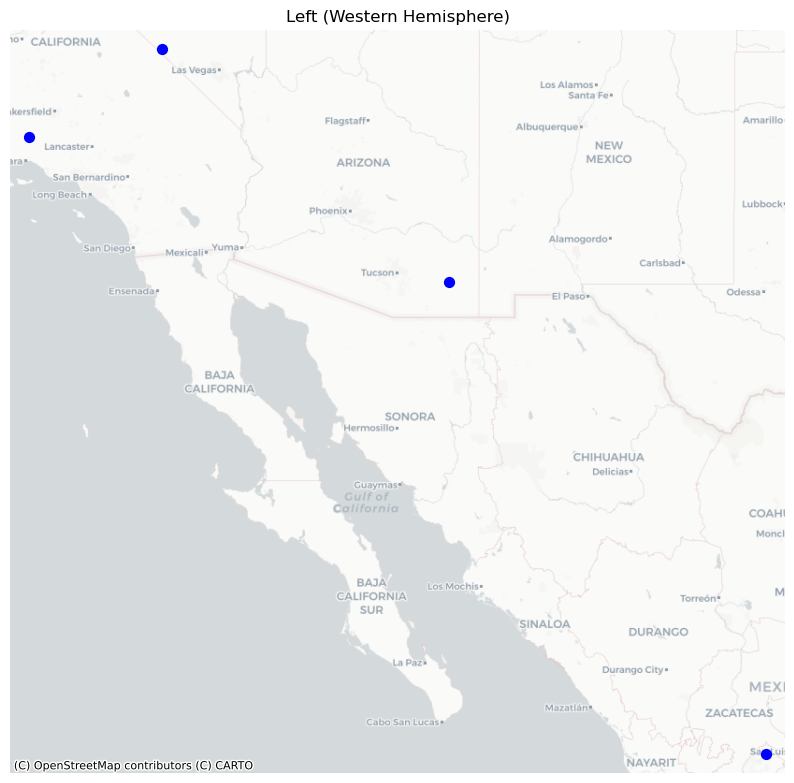

In [94]:
fig, ax = plt.subplots(figsize=(10, 10))

gdf_left.plot(
    ax=ax,
    markersize=50,
    alpha=1,
    color = "blue"
)

xmin, ymin, xmax, ymax = gdf_left.total_bounds
buffer = 50_000

ax.set_xlim(xmin - buffer, xmax + buffer)
ax.set_ylim(ymin - buffer, ymax + buffer)

cx.add_basemap(ax, source=cx.providers.CartoDB.Positron)
ax.set_title("Left (Western Hemisphere)")
ax.set_axis_off()

plt.show()


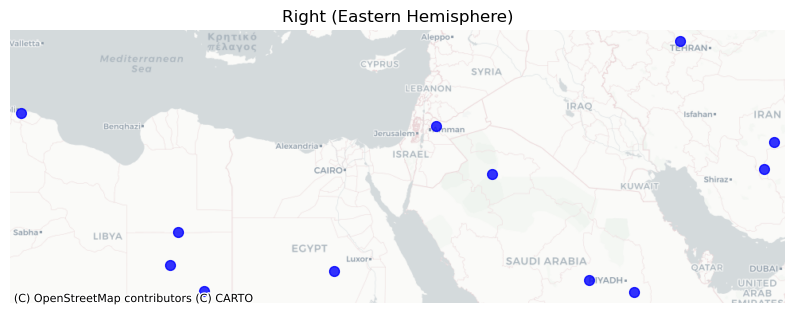

In [97]:
fig, ax = plt.subplots(figsize=(10, 10))

gdf_right.plot(
    ax=ax,
    markersize=50,
    alpha=0.8,
    color = "blue"
)


xmin, ymin, xmax, ymax = gdf_right.total_bounds
buffer = 70_000

ax.set_xlim(xmin - buffer, xmax + buffer)
ax.set_ylim(ymin - buffer, ymax + buffer)

cx.add_basemap(ax, source=cx.providers.CartoDB.Positron)
ax.set_title("Right (Eastern Hemisphere)")
ax.set_axis_off()

plt.show()


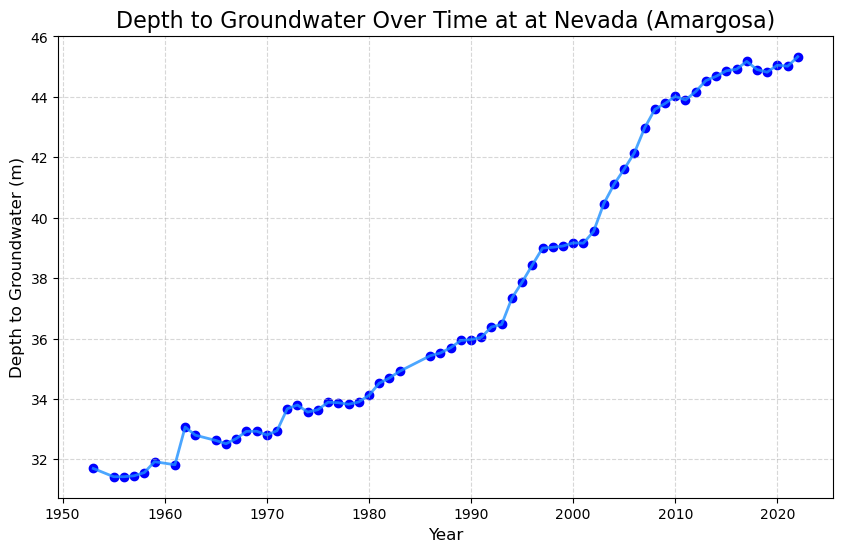

In [ ]:
gw_Willcox = gw_sites[gw_sites["Title Location"] == "Nevada (Amargosa)"]

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Line connecting points
plt.plot(
    gw_Willcox['YEAR'],
    gw_Willcox['WaterLevel_m'],
    color='dodgerblue',
    alpha=0.8,
    linewidth=2,
    label='Trend'
)

plt.scatter(
    gw_Willcox['YEAR'],
    gw_Willcox['WaterLevel_m'],
    color='blue',
    alpha=1
)


plt.xlabel('Year', fontsize=12)
plt.ylabel('Depth to Groundwater (m)', fontsize=12)
plt.title('Depth to Groundwater Over Time at at Nevada (Amargosa)', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


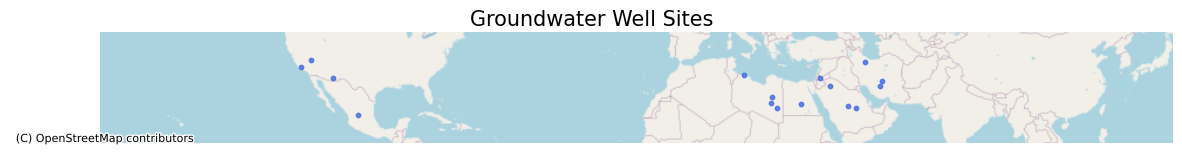

In [11]:
import matplotlib.pyplot as plt
import contextily as cx

gdf_web = gdf.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(15, 80))

xmin, ymin, xmax, ymax = gdf_web.total_bounds

# BIGGER buffer (50%)
x_buffer = (xmax - xmin) * 0.5
y_buffer = (ymax - ymin) * 0.5

ax.set_xlim(xmin - x_buffer, xmax + x_buffer)
ax.set_ylim(ymin - y_buffer, ymax + y_buffer)

gdf_web.plot(
    ax=ax,
    markersize=10,
    color="royalblue",
    alpha=0.8
)

cx.add_basemap(ax, source=cx.providers.OpenStreetMap.Mapnik)

ax.set_axis_off()
ax.set_title("Groundwater Well Sites", fontsize=15, pad=5)

plt.show()


